# Requisitos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from skimage.transform import resize
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Cargada de datos

In [4]:
X_raw = np.load('X.npy',allow_pickle=True)
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

In [5]:
print(X.shape)
print(y.shape)

(1000, 28, 28)
(1000,)


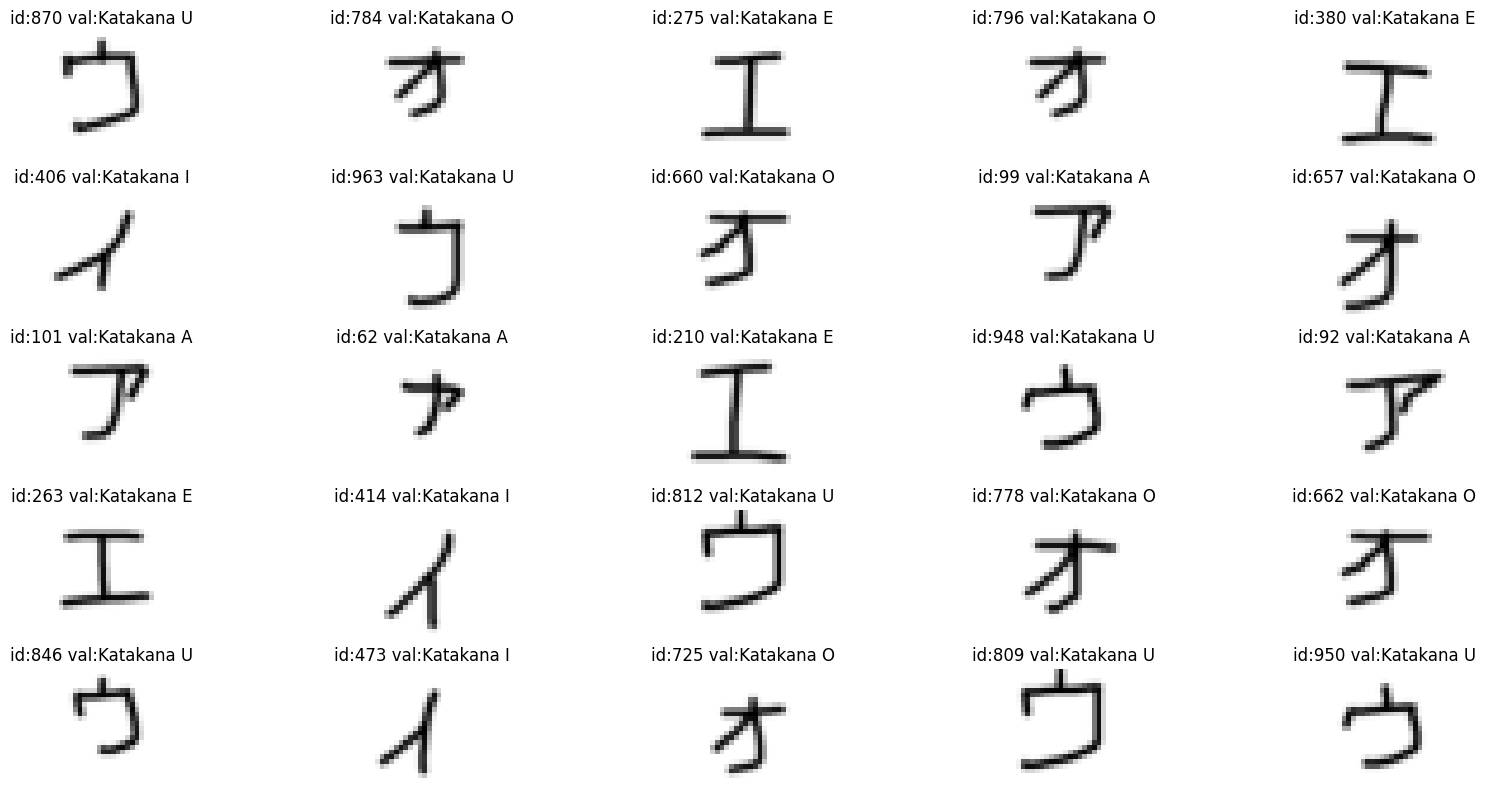

In [6]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Entrenamiento del modelo

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(800, 28, 28, 1) (200, 28, 28, 1)


In [8]:
bs = 10
lr = 0.0001
class_mapping = {'Katakana A': 0, 'Katakana E': 1,'Katakana I': 2,'Katakana O': 3,'Katakana U': 4}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(*size, 1)),
    MaxPool2D(),
    Dropout(0.65),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.L2(1e-4)),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

# Compilamos el modelo
optimizer = keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          1

In [10]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=100, validation_data=(X_test, y_test))
model.save('modelo_entrenado.h5')

Epoch 1/100
80/80 [==============================] - 2s 11ms/step - loss: 1.5155 - accuracy: 0.4675 - val_loss: 1.4732 - val_accuracy: 0.9800
Epoch 2/100
80/80 [==============================] - 1s 11ms/step - loss: 1.1229 - accuracy: 0.8188 - val_loss: 1.0020 - val_accuracy: 0.9300
Epoch 3/100
80/80 [==============================] - 1s 9ms/step - loss: 0.5459 - accuracy: 0.9137 - val_loss: 0.4336 - val_accuracy: 0.9800
Epoch 4/100
80/80 [==============================] - 1s 7ms/step - loss: 0.2498 - accuracy: 0.9638 - val_loss: 0.2209 - val_accuracy: 1.0000
Epoch 5/100
80/80 [==============================] - 1s 7ms/step - loss: 0.1612 - accuracy: 0.9675 - val_loss: 0.1254 - val_accuracy: 1.0000
Epoch 6/100
80/80 [==============================] - 1s 7ms/step - loss: 0.1091 - accuracy: 0.9812 - val_loss: 0.0792 - val_accuracy: 1.0000
Epoch 7/100
80/80 [==============================] - 1s 7ms/step - loss: 0.0822 - accuracy: 0.9862 - val_loss: 0.0610 - val_accuracy: 1.0000
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Probando el modelo

In [11]:
#Probando modelo
etiqueta_a_fruta = {0: 'Katakana A',1: 'Katakana E',2: 'Katakana I',3: 'Katakana O',4: 'Katakana U'}

In [12]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_fruta = etiqueta_a_fruta.get(label, 'Desconocida')

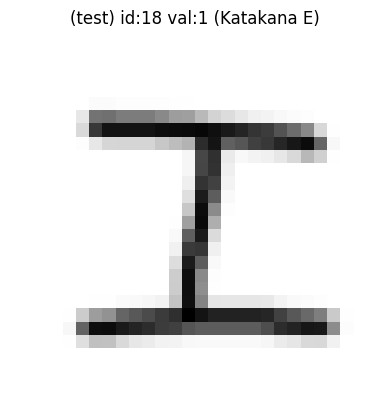

In [13]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombre_fruta))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()


In [14]:
#Usando el modelo
salida = model.predict(im[None,:,:,:])[0]

1/1 [==============================] - 0s 108ms/step


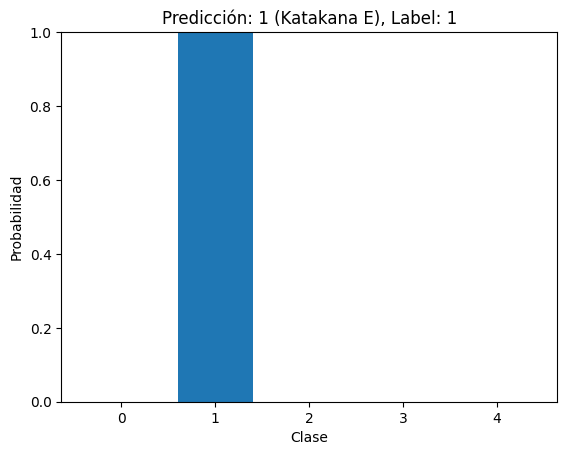

In [15]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombre_fruta, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()

In [16]:
score=model.evaluate(X_test,y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

7/7 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 1.0000
Test loss: 0.010196711868047714
Test accuracy: 1.0


7/7 [==============================] - 0s 5ms/step


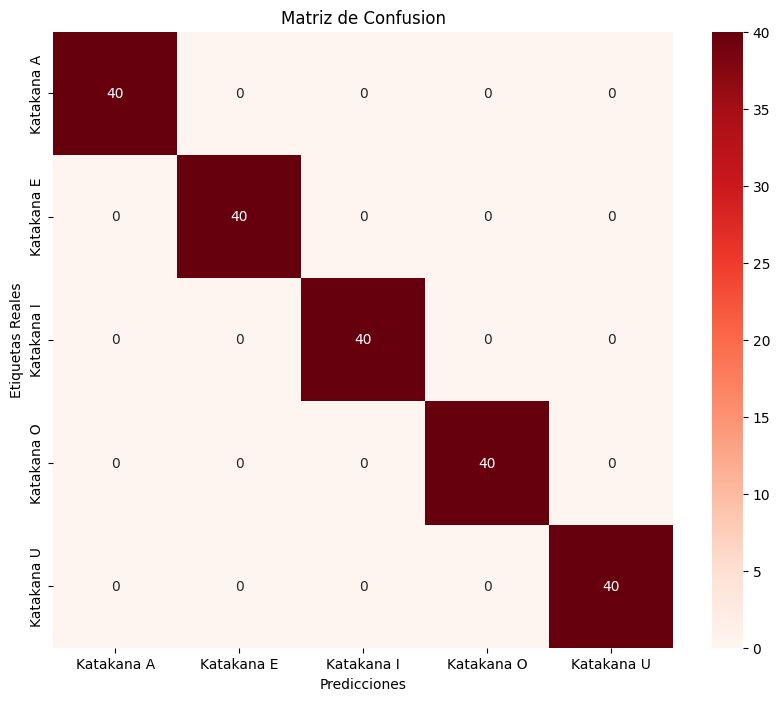

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred_classes)

class_mapping = {0: 'Katakana A', 1: 'Katakana E', 2: 'Katakana I', 3: 'Katakana O', 4: 'Katakana U'}
y_test_labels = [class_mapping[label] for label in y_test]
y_pred_labels = [class_mapping[label] for label in y_pred_classes]

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Reds', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusion')
plt.show()


In [18]:
classification_rep = classification_report(y_test_labels, y_pred_labels, target_names=class_mapping.values())
print(classification_rep)


              precision    recall  f1-score   support

  Katakana A       1.00      1.00      1.00        40
  Katakana E       1.00      1.00      1.00        40
  Katakana I       1.00      1.00      1.00        40
  Katakana O       1.00      1.00      1.00        40
  Katakana U       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

